In [10]:
from google.colab import drive
drive.mount('textvqa/')

Drive already mounted at textvqa/; to attempt to forcibly remount, call drive.mount("textvqa/", force_remount=True).


In [5]:
import random
from pathlib import Path
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

input_path:

In [17]:
input_question_path = "textvqa/MyDrive/textvqa/TextVQA_0.5.1_test.json"
input_image_path = "textvqa/MyDrive/textvqa/test_images/"
input_ocr_path = "textvqa/MyDrive/textvqa/TextVQA_Rosetta_OCR_v0.2_test.json"

In [50]:
def drawRect(coord: list):
    sx, sy, ex, ey = coord[0], coord[1], coord[2], coord[3]
    coord = [[sx, sy], [sx, ey], [ex, ey], [ex, sy], [sx, sy]]
    # coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    xs, ys = zip(*coord)  # create lists of x and y values
    plt.plot(xs, ys)


def default_loader(path):
    with open(path, "rb") as f:
        img = Image.open(f)
        return img.convert("RGB")


def get_coord(bbox, img_width, img_height):
    sx = bbox["top_left_x"]*img_width
    sy = bbox["top_left_y"]*img_height
    ex = sx + bbox["width"]*img_width
    ey = sy + bbox["height"]*img_height
    return [sx, sy, ex, ey]


def ocr_with_qa_visualization(que_path, img_path, json_path):
    qa_data = json.load(open(que_path))
    image2ocr = {}
    ocr_data = json.load(open(json_path))
    for data in ocr_data["data"]:
        image_name = data["image_id"]
        image2ocr[image_name] = data["ocr_info"]
    data = random.sample(qa_data["data"],1)[0]
    image_name = data["image_id"]
    question = data["question"]
    print("*"*50)
    print("question: ", question)
    img = default_loader(os.path.join(img_path, image_name+".jpg"))
    img_width, img_height = img.size
    all_ocr_info = image2ocr[image_name]
    for ocr_info in all_ocr_info:
        text = ocr_info["word"]
        bbox = ocr_info["bounding_box"]
        coord = get_coord(bbox, img_width, img_height)
        print("coord: ", coord, "text: ", text)
        plt.text(coord[0], coord[1], u'{}'.format(text), fontsize=10)
        drawRect(coord)
    plt.text(0, 0, u'que: {}'.format(question), fontsize=10)

    plt.imshow(img)
    plt.show()


**************************************************
question:  what does the sign say?
coord:  [311.18943786621094, 457.62969970703125, 476.0555877685547, 563.2591552734375] text:  EXIT


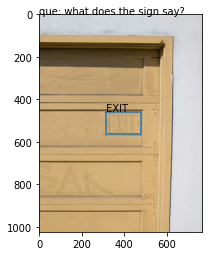

In [51]:
ocr_with_qa_visualization(input_question_path, input_image_path, input_ocr_path)